**Importing Libraries**

In [4]:
import io
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

**Loading The Datasets**

In [5]:
from google.colab import files
training_data = files.upload()
testing_data = files.upload()

Saving sign_mnist_train.csv to sign_mnist_train.csv


Saving sign_mnist_test.csv to sign_mnist_test.csv


**Converting The Datasets Into Pandas Dataframe**

In [6]:
df_training = pd.read_csv(io.BytesIO(training_data['sign_mnist_train.csv']))
df_testing = pd.read_csv(io.BytesIO(testing_data['sign_mnist_test.csv']))

**Splitting into Training and Testing Datasets**

In [7]:
X_train = df_training.drop(columns=['label']).values
Y_train = df_training['label'].values
X_test = df_testing.drop(columns=['label']).values
Y_test = df_testing['label'].values

**CNN Model Architecture**

In [8]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(26, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Model Visualization**

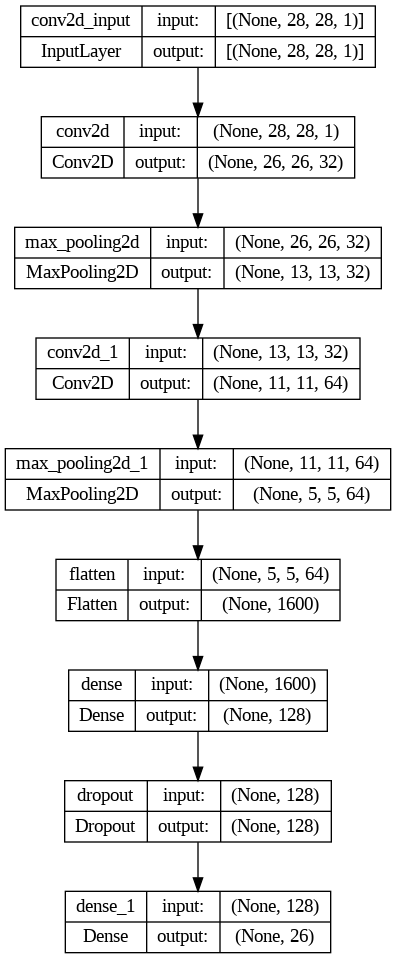

In [9]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
Image('model.png')

**Reshaping and Normalization of The Datasets**

In [10]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

**Model Training and Evaluation**

In [11]:
training_metrics = model.fit(X_train_normalized, Y_train, epochs=10, validation_data=(X_test_normalized, Y_test))

Epoch 1/10
858/858 [==============================] - 30s 33ms/step - loss: 1.1573 - accuracy: 0.6397 - val_loss: 0.5009 - val_accuracy: 0.8311
Epoch 2/10
858/858 [==============================] - 29s 34ms/step - loss: 0.2030 - accuracy: 0.9355 - val_loss: 0.3696 - val_accuracy: 0.8639
Epoch 3/10
858/858 [==============================] - 31s 36ms/step - loss: 0.0856 - accuracy: 0.9735 - val_loss: 0.3285 - val_accuracy: 0.9156
Epoch 4/10
858/858 [==============================] - 29s 34ms/step - loss: 0.0545 - accuracy: 0.9832 - val_loss: 0.2601 - val_accuracy: 0.9299
Epoch 5/10
858/858 [==============================] - 29s 34ms/step - loss: 0.0417 - accuracy: 0.9868 - val_loss: 0.3577 - val_accuracy: 0.9159
Epoch 6/10
858/858 [==============================] - 29s 34ms/step - loss: 0.0335 - accuracy: 0.9892 - val_loss: 0.4406 - val_accuracy: 0.8915
Epoch 7/10
858/858 [==============================] - 28s 33ms/step - loss: 0.0294 - accuracy: 0.9904 - val_loss: 0.3751 - val_accuracy:

**Model Loss and Accuracy Graphs**

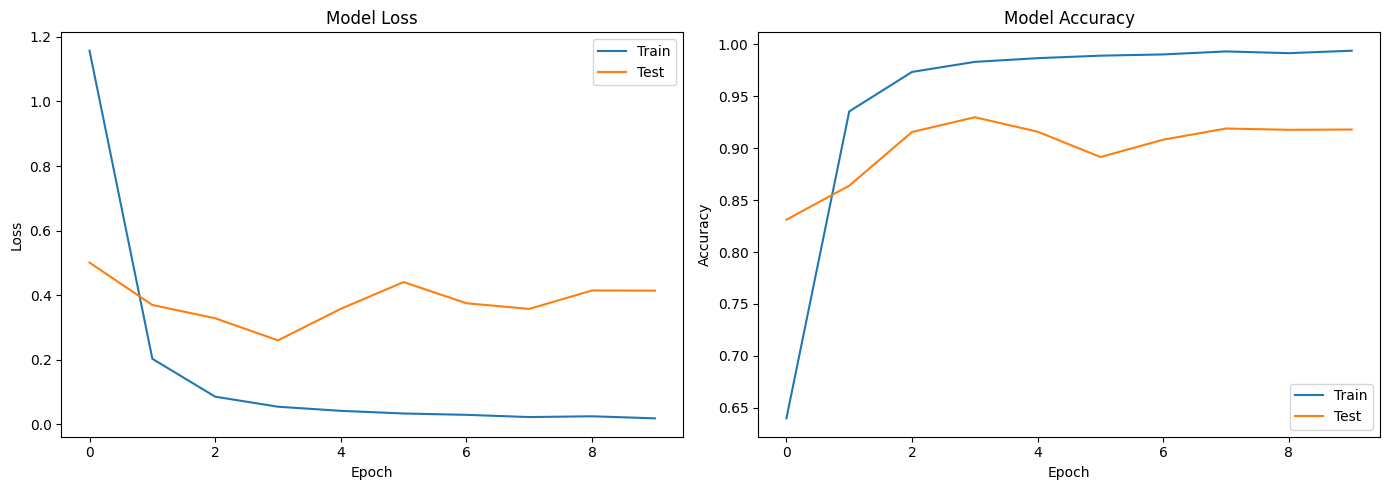

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(training_metrics.history['loss'], label='Train')
axes[0].plot(training_metrics.history['val_loss'], label='Test')
axes[0].set_title('Model Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend(loc='upper right')

axes[1].plot(training_metrics.history['accuracy'], label='Train')
axes[1].plot(training_metrics.history['val_accuracy'], label='Test')
axes[1].set_title('Model Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()

**Adding Another Dropout Layer (with rate = 0.3)**

In [13]:
model1 = Sequential()

# First Convolutional Layer
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2)))

# Second Convolutional Layer
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))

# Dropout Layer with rate = 0.3
model1.add(Dropout(0.3))

model1.add(Flatten())

model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.2))

# Output Layer
model1.add(Dense(26, activation='softmax'))
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Model Visualization**

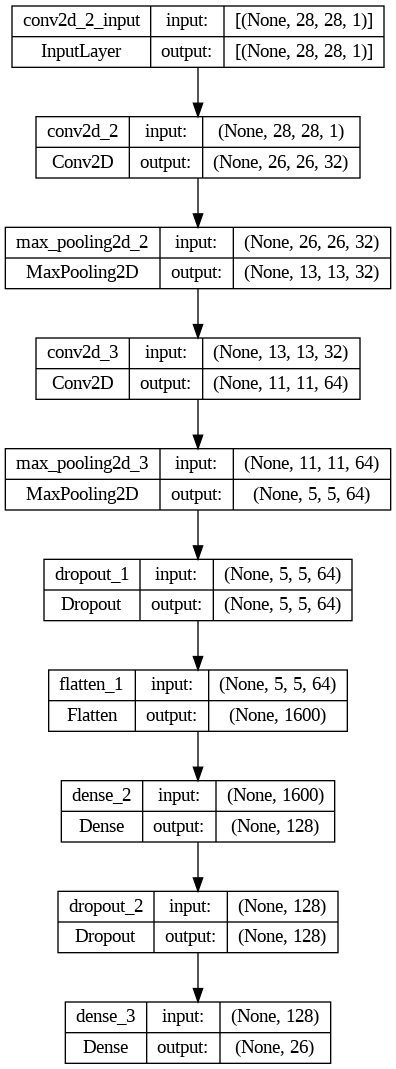

In [14]:
plot_model(model1, to_file='model1.png', show_shapes=True, show_layer_names=True)
Image('model1.png')

**Model Training and Evaluation**

In [15]:
training_metrics_new = model1.fit(X_train_normalized, Y_train, epochs=10, validation_data=(X_test_normalized, Y_test))

Epoch 1/10
858/858 [==============================] - 33s 35ms/step - loss: 1.1348 - accuracy: 0.6507 - val_loss: 0.4904 - val_accuracy: 0.8317
Epoch 2/10
858/858 [==============================] - 29s 33ms/step - loss: 0.2038 - accuracy: 0.9357 - val_loss: 0.2548 - val_accuracy: 0.9225
Epoch 3/10
858/858 [==============================] - 29s 34ms/step - loss: 0.0875 - accuracy: 0.9726 - val_loss: 0.2153 - val_accuracy: 0.9377
Epoch 4/10
858/858 [==============================] - 30s 35ms/step - loss: 0.0529 - accuracy: 0.9843 - val_loss: 0.2217 - val_accuracy: 0.9378
Epoch 5/10
858/858 [==============================] - 29s 33ms/step - loss: 0.0352 - accuracy: 0.9893 - val_loss: 0.2738 - val_accuracy: 0.9327
Epoch 6/10
858/858 [==============================] - 29s 34ms/step - loss: 0.0304 - accuracy: 0.9905 - val_loss: 0.2655 - val_accuracy: 0.9387
Epoch 7/10
858/858 [==============================] - 29s 34ms/step - loss: 0.0243 - accuracy: 0.9929 - val_loss: 0.2119 - val_accuracy:

**Model Loss and Accuracy Graphs**

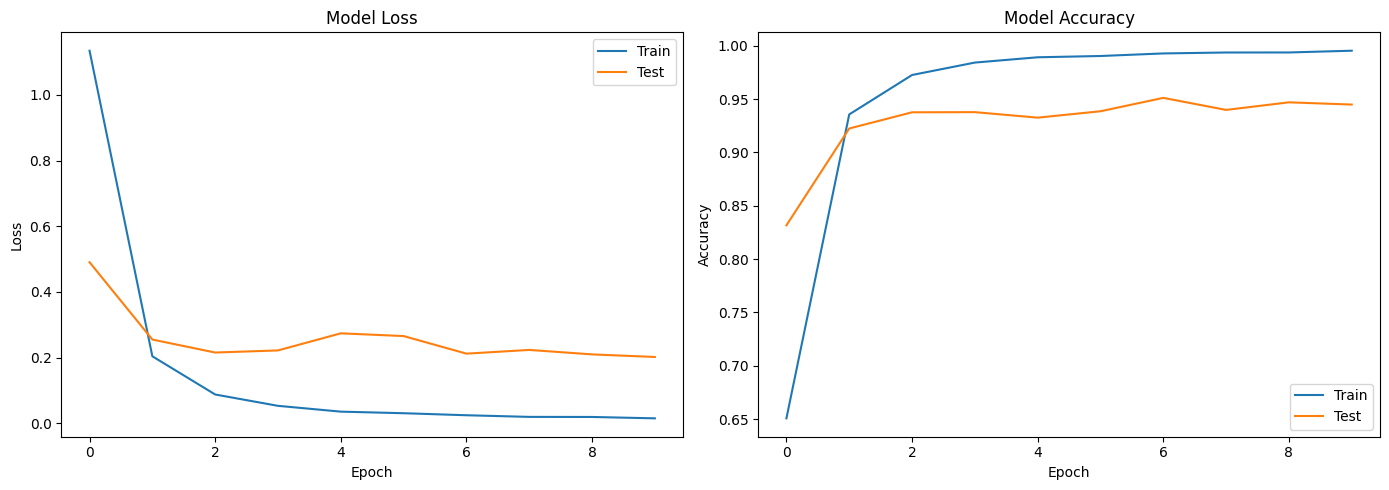

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(training_metrics_new.history['loss'], label='Train')
axes[0].plot(training_metrics_new.history['val_loss'], label='Test')
axes[0].set_title('Model Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend(loc='upper right')

axes[1].plot(training_metrics_new.history['accuracy'], label='Train')
axes[1].plot(training_metrics_new.history['val_accuracy'], label='Test')
axes[1].set_title('Model Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend(loc='lower right')

plt.tight_layout()
plt.show()